아래 강의 노트는 [Python for data Analysis 책](https://github.com/wesm/pydata-book)4장을 기반으로 번역 및 편집하여 페이지 구성함
<br><img src ="https://image.yes24.com/goods/73268296/800x0" width=5%>

<font color ="blue"> **무단 배포를 금지 합니다.** </font>


# pandas 시작하기

- **공식홈페이지 :**  https://pandas.pydata.org/
- **문서** https://pandas.pydata.org/

``` scipy``` , ``` numpy```, ``` statsmodels```, ``` scikit-learn```와 ``` matplotlib```와 함께 사용 하는 경우가 흔함

* ```numpy```  :  단일 산술 배열 데이터를 다루는데 특화
* ```pandas``` :  표 형식의 데이터나 다양한 형태의 데이터를 다루는데 초점

판다스(Pandas)는 Python에서 DB처럼 테이블 형식의 데이터를 쉽게 처리할 수 있는 라이브러리 입니다. 데이터가 테이블 형식(DB Table, csv 등)으로 이루어진 경우가 많아 데이터 분석 시 자주 사용하게 될 Python 패키지입니다.

In [1]:
import pandas as pd

```series```와 ```Dataframe```은 로컬 네임스페이스로 임포트 하는 것이 편하기 때문에 다음과 같이 사용

In [2]:
from pandas import Series, DataFrame

## pandas 자료구조
### Series
```series``` 는 객체를 담을 수 있는 1차원 배열같은 자료구조
**색인** 이라고하는 배열의 데이터와 연관된 이름을 갖음
<img src="https://laboputer.github.io/assets/img/ml/python/pandas/1.JPG" width= 50%>

###### 출처 :https://laboputer.github.io/assets/img/ml/python/pandas/1.JPG

In [3]:
import numpy as np
import pandas as pd
obj = pd.Series([4, 7, -5, 3])  #시리스로 만들면 왼쪽에 색인을 만들어줌! 넘파이와의 차이
print(obj)
nparr = np.array([[4, 7, -5, 3]])
nparr

0    4
1    7
2   -5
3    3
dtype: int64


array([[ 4,  7, -5,  3]])

Series의 배열과 색인 객체는 각각 ```value```, ```index``` 속성을 통해 얻기 가능

In [4]:
print(obj.values)
print(obj.index)  # like range(4)  #0부터, 4(-1)까지, 1씩 증가 = 기본값

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


색인을 지정하여 ```Series```객체를 생성할 때

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])  #내가 인덱스를 특별하게 만들 수 있음
print(obj2)
print(obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')


In [6]:
obj2['a']
obj2['d'] = 6  #해당 인덱스의 값을 변경
OB=obj2[['c', 'a', 'd']]  #해당 인덱스에 해당하는 값만 가져옴
OB
obj2

d    6
b    7
a   -5
c    3
dtype: int64

```Series```는 고정길이의 정렬된 사전형
색인값에 데이터 값을 매핑 하고 있기때문에, 파이썬의 사전형과 비슷

In [7]:
import numpy as np
print(obj2[obj2 > 0])  #값이 양수인 값만 가져옴
print(obj2 * 2)
print(np.exp(obj2))

d    6
b    7
c    3
dtype: int64
d    12
b    14
a   -10
c     6
dtype: int64
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [8]:
print('b' in obj2)
print('e' in obj2)

True
False


파이썬의 ```Dictionary``` 타입을 ```Series```로 변형가능

In [9]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)  #key를 인덱스, value를 값으로 만듦
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

사전 객체만으로 ```Series```객체를 생성하면 생성된 ```Series```객체의 색인에는 사전의 키 값의 순서대로 입력

색인을 지정하고 싶다면 원하는 순서대로 색인을 직접 넘기기 가능
* 아래의 예는 ```sdata```에 있는 값중 3개만 확인 가능
* California는 값을 찾을수 없기 때문에 ```NaN``` 표시
* utah는 색인에 없기 때문에 실행결과에서 빠짐

In [10]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)  #없으면 NaN으로 출력
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

```isnull```,```notnull```누락된 데이터를 찾을 때 사용

In [11]:
pd.isnull(obj4)  #누락되었니? (없으면 True)
pd.notnull(obj4)  #누락되지 않았니? (없으면 False)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [12]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

```Series```에서 산술 기능은 색인과 라벨로 자동 정렬
데이터 베이스 에서 join연산과 비슷하게 작동

In [13]:
print(obj3)
print(obj4)
#겹치는 애들은 더해줌(값을), 둘 중 하나라도 없으면 NaN(교집합만 값 나옴). 
#4에 3을 더했으니 4의 순서대로 출력 후 없는 3 추가
obj4 + obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

```name``` 속성을 이용하여 시리즈 데이터에 이름
```index.name``` 속성으로 시리즈의 인덱스에도 이름

In [14]:
obj4.name = 'population'  #이 시리즈의 이름(제목)
obj4.index.name = 'state'  #인덱스의 이름
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [15]:
print(obj)  #원래 obj의 인덱스는 숫자
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']  #인덱스를 변경하겠다!
obj  #이거는 인덱스 이름을 변경하는 것! 데이터 순서가 안바뀐다

0    4
1    7
2   -5
3    3
dtype: int64


Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

특징
* ```DataFrame```은 스프레드 시트 형식의 자료구조이고 여러개의 컬럼이 있는데 각 컬럼은 서로 다른 종류의 값(숫자, 문자열, 불리언)을 담을 수 있음
* ```DataFrame```은 로우와 컬럼에 대한 색인을 갖고 있는데 ```Series```객체를 담고 있는 파이썬의 사전으로 생각 가능
* ```DataFrame```은 물리적으로는 2차원 이지미만 계층적 색인을 이용하여 고차원 데이터 표현 가능

가장 흔하게 사용되는 표현 방법은 아래와 같이 리스트에 담긴 사전이용하거나 numpy배열이용
<img src="https://laboputer.github.io/assets/img/ml/python/pandas/2.JPG" width=50%>

##### 출처 :https://laboputer.github.io/assets/img/ml/python/pandas/2.JPG

In [16]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],  #행부터 채움 = 첫 번째 key는 열의 이름이 됨
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}  
frame = pd.DataFrame(data)  #딕셔너리의 key 값은 열의 이름으로 감!! 행은 자동으로 숫자

In [17]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [18]:
frame.head()  #맨 처음 5개만 출력

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


```head```메서드를 이용하여 처음 5개의 행만 출력 가능

In [19]:
frame.tail()  #맨 마지막 5개만 출력

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


```columns```를 지정하면 원하는 순서를 가진 ```DataFrame```객체 생성

In [20]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])  #열의 순서를 바꿈
#딕셔너리의 key는 수정 불가 = 데이터프레임의 열 이름은 수정 불가!!!! 이건가봐!!!

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


```Series```와 마찬가지로 사전에 없는 값을 넘기면 결측치로 저장

In [21]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],  #debt이라는 열을 추가 = NaN을 값으로 열이 추가됨
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
#data가 딕셔너리이므로 year, state, pop은 이미 정보와 떨어질 수 없는 사이!! 순서가 바뀜!!
print(frame2)
frame2.index

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN


Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

```DataFrame```은 ```Series```처럼 사전 형식의 표기법이나 속성 형식으로 표기 가능

In [22]:
print(frame2['state']) # 사전 형식  #state 열을 가져옴
frame2.year     #속성 형식  #year 열을 가져옴

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object


one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

행의 위치나 ```loc```속성을 이용하여 이름을 통해 접근 가능

In [23]:
frame2.loc['three']  #three 인덱스의 값을 가져옴

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [24]:
frame2['debt'] = 16.5  #debt의 모든 값을 바꿔줌
print(frame2)
frame2['debt'] = np.arange(6.)  #arange 함수로 인해 1씩 증가함
print("\n\n",frame2)

       year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5


        year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


In [25]:
#two, four, five 인덱스의 값을 -1.2, -1.5, -1.7로 바꾸기
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val 
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


```frame2.state```이 ```'Ohio'```인지 아닌지에 대한 불리언 값을 담고 있는 ```'eastern'```이라는 새로운 컬럼 값을 생성

In [26]:
frame2['eastern'] = frame2.state == 'Ohio'  #state가 Ohio인 값(T/F로 만들어짐)에 대해 열 추가
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


```del```예약어를 이용하여 컬럼 삭제 가능

In [27]:
del frame2['eastern']  #해당 열을 전부 삭제
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

중첩된 사전을 ```DataFrame```에 넘기면 바깥에 있는 사전의 키는 컬럼이 되고 안에 있는 키는 로우가 된다.

In [28]:
#1번의 key = 열, 값 = 행(내부의 key = 인덱스, 값 = 값)
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [29]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


```Numpy```배열과 유사한 문법으로 데이터 전치 가능

In [30]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [31]:
pd.DataFrame(pop, index=[2001, 2002, 2003])  #인덱스를 수정, 2003년 없으니까 NaN
#얘도 마찬가지로 딕셔너리로 정해진 값이기 때문에 인덱스와 값은 고정됨!! 붙어있어!!

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [32]:
pdata = {'Ohio': frame3['Ohio'][:-1],  #마지막 빼고: 2002년까지
         'Nevada': frame3['Nevada'][:2]}  #0, 1번만: 2002년까지 가져옴
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [33]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3  #각 행 인덱스의 이름, 열 인덱스의 이름을 지어줌

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Series와 유사하게 values속성은 DataFrame에 저장된 데이터를 2차원 배열로 반환

In [34]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [35]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 색인 객체 (Index Objects)

색인 객체는 표형식의 데이터에서 각 행과 열에 대한 이름과 다른 메타데이터를 저장하는 객체
```Series``` 나 ```DataFrame```객체를 생성할 때 사용되는 배열이나 다른 순차적인 이름은 내부적으로 색인으로 변환

In [36]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
idx = obj.index
print(idx)
#idx[1]='f'  #인덱스의 하나의 값만을 바꿀 수는 없어!!
#obj.index = ['a', 'f', 'c'] 인덱스 값을 바꾸고싶다면 이렇게 전부 써주기!

Index(['a', 'b', 'c'], dtype='object')


색인 객체는 변경 불가능
```python
# python 
index[1] = 'd'  # TypeError
```

In [37]:
labels = pd.Index(np.arange(3))  #생성부터 인덱스 형태로 만들어버림!!
print(labels)  
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print("\n\n",obj2)
print("\n\n",obj2.index is labels)

Int64Index([0, 1, 2], dtype='int64')


 0    1.5
1   -2.5
2    0.0
dtype: float64


 True


In [38]:
print(frame3)
print("\n\n",frame3.columns)
print("\n\n",'Ohio' in frame3.columns)  #열 인덱스에 Ohio가 있나?
print("\n\n", 2003 in frame3.index)  #행 인덱스에 2003이 있나?

state  Nevada  Ohio
year               
2001      2.4   1.7
2002      2.9   3.6
2000      NaN   1.5


 Index(['Nevada', 'Ohio'], dtype='object', name='state')


 True


 False


파이썬의 집합과는 달리 pandas의 인덱스는 중복 값을 허용.

In [39]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])  #인덱스 foo가 두 개 생김
print(dup_labels)
dl = pd.Series([1,2,3,4],index= dup_labels)
print("\n\n",dl)
print("\n\n",dl['foo'])  #사전형식
print("\n\n",dl.foo)  #속성형식



Index(['foo', 'foo', 'bar', 'bar'], dtype='object')


 foo    1
foo    2
bar    3
bar    4
dtype: int64


 foo    1
foo    2
dtype: int64


 foo    1
foo    2
dtype: int64


## 핵심 기능

### 재색인 기능

새로운 색인데 맞도록 객체를 새로 생성  
```Series```객체에 대해서 ```reindex```를 호출하면 데이터를 새로운 색인데 맞게 재배열하고 존재하지 않는 색이 있다면 ```NaN```을 추가

In [40]:
import pandas as pd
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [41]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])  #인덱스를 다시 정렬(인덱스에 맵핑된 값은 변하지 않음)
#인덱스 이름을 완전 바꾸고싶으면 obj2.index = [모든 데이터의 인덱스 이름]을 해야 함
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

시계열 같은 순자적인 데이터 재색인할 때 값을 보간 하거나 채워 넣어야 할 경우, ```method``` 옵션을 이용해 이를 해결 가능 하며 ```ffill```같은 메서드를 이용하여 누락된 값을 직전의 값으로 채워 넣을 수 있다.   

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

In [42]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='bfill')  #빈 자리는 뒤에 있는 값을 그대로 가져다 쓰겠다
#ffill: 빈 자리는 앞에 있는 값을 그대로 가져다 쓰겠다 (없으면 NaN)

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [43]:
obj3.reindex(range(6))  #method를 안쓰면 그냥 NaN으로 채움

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

```reindex```는 색인과 컬럼  또는 둘다 변경 가능 

In [44]:
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),  #행이 제일 먼저 채워짐
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

frame2 = frame.reindex(['a', 'b', 'c', 'd'])  #b 인덱스를 추가, method가 없으니까 값은 Nan
print(frame)
frame2

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


컬럼은 ```reindex``` 예약어를 사용해서 재색인

In [45]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)
#재색인함, 따라서 텍사스 - 유타 - 캘 순서로 만들어짐

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [46]:
frame  #원본은 변하지 않아!!!!

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [47]:
frame.loc[['a','c']]  #인덱스 'a', 'c'의 값만 가져와라

,Ohio,Texas,California
a,0,1,2
c,3,4,5


### 하나의 행이나 열 삭제 하기

```drop``` 메서들를 사용하여 선택한 값들이 삭제된 새로운 객체 얻기 가능   


**주의:** drop함수는 특정 행 또는 열을 drop하고난 DataFrame을 반환한다.
즉, 반환을 받지 않으면 기존의 DataFrame은 그대로이다.
아니면, inplace=True라는 인자를 추가하여, 반환을 받지 않고서도 기존의 DataFrame이 변경되도록 한다.


In [48]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
print(obj)
new_obj = obj.drop('c')
print(new_obj)
obj
print(obj.drop(['d', 'c'],axis=0))
obj  #drop을 사용해도 원본은 변하지 않음!!(객체 반환)
#원본을 수정하고싶으면 inplace = True를 조건으로 넣어주면 됨

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64
a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64
a    0.0
b    1.0
e    4.0
dtype: float64


a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [49]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [50]:
data.drop(['Colorado', 'Ohio'])


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [51]:
data.drop('two', axis=1)  #열을 삭제하고싶으면 axis = 1을 넣어야 함
data=data.drop(['two', 'four'], axis='columns')
data

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [52]:
obj.drop('c', inplace=True)  #inplace = True로 설정했기 때문에 원본이 수정됨
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### 색인하기, 선택하기, 거르기

```Numpy``` 의 색인과 ```pandas```색인은 유사하게 동작하지만 정수가 아니어도 된다

In [53]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
display(obj)
print(obj['b'])  #1.0
print(obj[1])  #1.0
print(obj[2:4])  #2.0, 3.0
print(obj[['b', 'a', 'd']])  #1.0, 0.0, 3.0
print(obj[[1, 3]])  #1.0, 3.0
obj[obj < 2]
#obj[]는 하나만 가능하기 때문에 값만 출력,
#obj[[]], obj[조건]는 시리즈로 출력  @하나라도 시리즈로 하고싶으면 [1:2]로 슬라이싱!

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

1.0
1.0
c    2.0
d    3.0
dtype: float64
b    1.0
a    0.0
d    3.0
dtype: float64
b    1.0
d    3.0
dtype: float64


a    0.0
b    1.0
dtype: float64

라벨 이름으로 슬라이싱 하면 시작점과 끝점을 **"포함"**한다는 것이 일반 파이썬의 슬라이싱과 다른 점

In [54]:
obj['b':'c']  #라벨 이름으로 슬라이싱을 했기 때문에 c도 포함!!!

b    1.0
c    2.0
dtype: float64

슬라이싱 문법으로 선택된 영역에 값을 대입하는 것은 생각하는 대로 동작 한다.

In [55]:
obj['b':'c'] = 5  #색인을 이용하여 값을 바꾸는 것 가능!!
print(obj)
obj[1]=10  #이거는 시리즈의 '값'이니 바꿀 수 있음
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64


a     0.0
b    10.0
c     5.0
d     3.0
dtype: float64

색인으로 DataFrame 에서 하나 이상의 컬럼 값을 가져 올 수 있다.

In [56]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data
print(data['two'])
print(data[['three', 'one']])
data

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32
          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


슬라이싱으로 로우를 선택하거나, 불리언 배열로 로우 선택 가능   
[ ]연산자에 단일 값을 넘기거나 리스트를 넘겨서 여러 컬럼 값을 선택 할 수 있음

In [57]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [58]:
print(data[:2])
print(data[data['three'] > 5])
data

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


스칼라 값으로 비교시에는 불리언 DataFrame을 사용해서 값을 선택

In [59]:
print(data < 5)  # 데이터 중 5 이하인 데이터만 True
data[data < 5] = 0
data

            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False


,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### loc and iloc으로 선택하기

In [60]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [61]:
data.loc['Colorado', ['two', 'three']]  #인덱스 Colorado의 칼럼 two, three 값만 가져옴
#인덱스는 [바로], 칼럼은 여러 개를 가져오니까[[이중]]

two      5
three    6
Name: Colorado, dtype: int32

In [62]:
#iloc: 인덱스 순서(숫자)로 가져옴
#loc: 인덱스 이름으로 가져옴

data.iloc[2, [3, 0, 1]]  #3번째 인덱스(Utah)와 4, 1, 2번째 칼럼(four, one, two)을 가져옴


four    11
one      8
two      9
Name: Utah, dtype: int32

In [63]:
data.iloc[2]  #3번째 인덱스(Utah)를 가져옴

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [64]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [65]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [66]:
data.loc[:'Utah', 'two']  #인덱스는 처음~Utah, 칼럼은 two


Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [67]:
data.iloc[:, :3][data.three > 5]  #인덱스 전부, 칼럼 3번째까지, three가 5 이상만

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### 정수 색인

아래의 예에서 라벨 색인이 0,1,2를 포함하는 경우 사용자가 라벨 색인으로 선택하려는 것인지 정수 색인으로 선택하려는 것인지 추측하기 쉽지 않음

In [68]:
ser = pd.Series(np.arange(3.),index=[1,2,3])
ser[2]
#원래의 인덱스(0,1,2)일까, 내가 정한 인덱스(1,2,3)일까 헷갈림!!
#여기서는 사람이 정한 인덱스의 의미로 2번째 값인 1이 나오긴 함

1.0

In [69]:
ser = pd.Series(np.arange(3.))

In [70]:
ser[2]  #따로 정한 인덱스가 없으니 default 값인 (0, 1, 2)의 2로 선택됨

2.0

반면  아래와 같이 정수 색인이 아닌 경우 이러한 모호함은 사라짐

In [71]:
#방법1: 인덱스를 문자로 설정
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

일관성 유지를 위하여 정수값을 담고 있는 축 색인이 있다면 우선적으로 라벨을 먼저 찾음

조금 더 세밀하게 사용하고 싶다면 라벨에 대해서는 ```loc```를 사용하고 정수 색인에 대해서는 ```iloc```을 사용

In [72]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [73]:
print(ser[:1])
#방법2: loc, iloc 함수 사용
print(ser.loc[:1])  #loc 함수를 사용하면 1번까지 포함하여 0, 1이 나옴(인덱스의 이름이니까!)
ser.iloc[:1]  #iloc 함수를 사용하면 1번을 포함하지 않아 0만 나옴(인덱스의 순서)

0    0.0
dtype: float64
0    0.0
1    1.0
dtype: float64


0    0.0
dtype: float64

In [74]:
ser.iloc[:1]

0    0.0
dtype: float64

### 산술 연산과 데이터 정렬

pandas에서 가장 중요한 기능 중 하나는 다른 색인을 가지고 있는 객체 간의 산술 연산
객체를 더할때 짝이 맞지 않는 색인이 있다면 결과에 두색인이 통합  
서로 겹치는 색인이 없는 경우 데이터는 NA 값

In [75]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1


a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [76]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [77]:
s1 + s2  #인덱스가 같으면 연산, 같은 인덱스가 없으면 NaN으로 표시

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

```Dataframe```의 경우 정렬은 로우와 컬럼 모두 적용

In [78]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1


,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [79]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


c 와 e 컬럼이 양쪽 DataFrame객체에 존재하지 않으므로 결과에서 모두 없는 값으로 나타남   
로우 역시 마찬가지로 양쪽에 다 존재하지 않는 라벨에 대해서는 없는 값으로 나타남


In [80]:
df1 + df2  #겹치는 데이터(Ohio, Texas, b, d)만 연산, 나머지는 NaN

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [81]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
print(df1)
print(df2)
df1 - df2

   A
0  1
1  2
   B
0  3
1  4


,A,B
0,NaN,NaN
1,NaN,NaN


#### 산술 연산 메서드를 채워 넣을 값 지정하기

In [82]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [83]:
df2.loc[1, 'b'] = np.nan  #인덱스 1 칼럼 b인 값을 NaN으로 변경(1행b열)
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


겹쳐지지 않는 부분은 NA

In [84]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


df1에 add 메서드를 사용하고 df2와 fill_value 값을 인자로 전달

In [85]:
d=df1.add(df2, fill_value=0)  #공통이 아닌 부분은 0으로 채우기
d

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


r로 시작하는 메서더는 계산 인자를 뒤집어 계산

In [86]:
1 / df1  #df1의 역수


,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [87]:
df1.rdiv(1)  #df1의 역수

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [88]:
df1.reindex(columns=df2.columns, fill_value=0)  #열 배치를 df2의 배치로 바꿈, 겹치지 않는 부분은 0으로 채우기

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### DataFrame 과 Series 간의 연산

브로드 캐스팅을 이용하여 빼기

In [89]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [90]:
arr[0]

array([0., 1., 2., 3.])

In [91]:
arr - arr[0]  #0열-0, 1열-1, 2열-2, 3열-3

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [92]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [93]:
series = frame.iloc[0]  #Utah 데이터
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [94]:
frame - series  #b열-0, d열-1, e열-2

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


기본적으로 DataFrame과 Series간의 산술 연산은 Series의 색인을 DataFrame의 컬럼에 맞추고 아래 로우로 전파

In [95]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
print(series2)
frame + series2  #b열+0, e열+1

b    0
e    1
f    2
dtype: int64


,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [96]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [97]:
series3 = frame['d']
series3


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

```axis='index'``` 나```axis=0``` 은 DataFrame의 로우를 따라 연산을 수행

In [98]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [99]:
series3


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [100]:
print(frame.sub(series3, axis='index'))
frame.sub(series3, axis = 0)  #각 행별로 빼기(Utah행-1, Ohio행-4)

          b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0


,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### 함수 적용과 매핑

In [101]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame


,b,d,e
Utah,1.896259,-0.215862,-0.276830
Ohio,-0.495674,-1.094199,-0.159133
Texas,1.063314,2.011979,-0.694412
Oregon,0.089385,0.622765,1.592922


In [102]:
np.abs(frame)

,b,d,e
Utah,1.896259,0.215862,0.276830
Ohio,0.495674,1.094199,0.159133
Texas,1.063314,2.011979,0.694412
Oregon,0.089385,0.622765,1.592922


함수 f는 Sereies의 최대값과 최소값 차이를 계산 하는 함수

In [103]:
f = lambda x: x.max() - x.min()
frame.apply(f)  #열별로 연산이 됨! 각 열에서 가장 큰 값 - 작은 값
#apply로 기본 = 행이 사라짐(결과가 열만 나옴), axis = 1: 열이 사라짐(결과가 행만 나옴)

b    2.391933
d    3.106178
e    2.287335
dtype: float64

함수의 인자로 ```axis='columns'```를 넘기면 각 행에 대해 한번씩 수행

In [104]:
frame.apply(f, axis='columns')  #행별로 연산! 각 행에서 가장 큰 값 - 작은 값 (열 고정)

Utah      2.173089
Ohio      0.935066
Texas     2.706391
Oregon    1.503537
dtype: float64

In [105]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)  #행 고정!! 각 열별로 가장 큰 값과 작은 값 가져옴
#apply를 누르면 변수 자리에 있는 함수를 실행시킴( .apply(f))
#axis = 0으로 열만 나오는 형태임, 여기에 index를 추가했기 때문에 df 형태로 출력!

,b,d,e
min,-0.495674,-1.094199,-0.694412
max,1.896259,2.011979,1.592922


frame객체에서 실수값을 문자열 포맷으로 변환하고 싶다면 ```applymap```을 이용해서 사용

In [106]:
format = lambda x: '%.2f' % x
frame.applymap(format)  #유효숫자가 많이 필요하지 않다면 applymap
#행, 열만 뽑아오는 것이 아닌 모든 요소에 적용시키고싶다면 applymap을 이용!

,b,d,e
Utah,1.90,-0.22,-0.28
Ohio,-0.50,-1.09,-0.16
Texas,1.06,2.01,-0.69
Oregon,0.09,0.62,1.59


In [107]:
frame['e'].map(format)  #'e'열만 실행시켜 가져옴

#map 함수는 시리즈에서 사용 => frame의 'e'열만 가져왔으니 시리즈라고 볼 수 있음! 각 행에 대해 함수 실행

Utah      -0.28
Ohio      -0.16
Texas     -0.69
Oregon     1.59
Name: e, dtype: object

## @@@ 정리 @@@

apply: DataFrame에서 행 또는 열만 함수를 적용한 결과로 가져오고싶다

applymap: DataFrame에서 모든 원소에 대해 함수를 적용하고싶다

map: Series에 대해 함수를 적용하고싶다

agg: 그룹에 대해 통계를 적용한 결과를 가져오고싶다 => agg의 목적은 통계: 데이터가 숫자인 데이터에 대해서만 통계를 진행!
agg 함수도 사용자 작성 함수를 사용할 수 있음, 하지만 파라미터가 두 개 이상이면 리턴의 형태여야 함!

### 정렬과 순위

In [108]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()  #인덱스를 순서대로 정리해줌! 값은 mapping된거니까 뒤죽박죽 됨

a    1
b    2
c    3
d    0
dtype: int64

In [109]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
print(frame)
frame.sort_index()  #인덱스 순서대로 정리를 해줌 = 알파벳 순서임
#frame.sort_index(axis=1)

       d  a  b  c
three  0  1  2  3
one    4  5  6  7


,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [110]:
frame.sort_index(axis=1)  #칼럼 순서대로 정리를 해줌 

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [111]:
frame = frame.sort_index()  #이건 그냥 내가 맞추려고 한거.. 교수님이 이렇게 바꿈 위에서..
frame.sort_index(axis=1, ascending=False)  #아스키코드 역순! 열을 역순으로 정렬

,d,c,b,a
one,4,7,6,5
three,0,3,2,1


In [112]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()  #값을 오름차순으로 정렬, ascending = False를 주면 내림차순으로 정렬

2   -3
3    2
0    4
1    7
dtype: int64

In [113]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()  #NaN은 마지막에 정렬 따로

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [114]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print(frame)
frame.sort_values(by='b')  #'b'열의 값을 기준으로 정렬 => 다른 열들은 b에 맞춘 순서로

   b  a
0  4  0
1  7  1
2 -3  0
3  2  1


,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [115]:
frame.sort_values(by=['a', 'b'])  #a -> b 순서로 정렬: a가 같으면 b의 값을 봄

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [116]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()  #가장 작은 값을 1등으로 오름차순으로 순위 매김! 같은 숫자면 n.5등

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [117]:
obj.rank(method='first')  #first로 인해 순서가 먼저인 index에게 더 큰 순위를 줌!(공동이 없음)

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [118]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')  #ascending으로 가장 작은 숫자가 꼴찌!
#max로 인해 공동은 둘 다 다음 순위를 줌 ex. 공동1등 => 2등, 2등

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [119]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
print(frame)
frame.rank(axis='columns')  #각 행별로 순위를 매김 == axis = 1
#axis가 없으면 열별로 순위를 매김!

     b  a    c
0  4.3  0 -2.0
1  7.0  1  5.0
2 -3.0  0  8.0
3  2.0  1 -2.5


,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

In [120]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [121]:
obj.index.is_unique  #겹치는 인덱스가 있으면 False

False

In [122]:
print(obj['a'])  #a가 두 개 있기 때문에 시리즈 형태로 나옴
obj['c']

a    0
a    1
dtype: int64


4

In [123]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
print(df)
df.loc['b']  #b가 두 개 있기 때문에 df 형태로 나옴, 하나만 있었다면 시리즈 형태

          0         1         2
a -0.377641  0.087900 -1.338518
a -1.266980  1.196294  0.288308
b -1.393551  0.702982  0.092015
b -0.535442  0.772526 -1.447103


,0,1,2
b,-1.393551,0.702982,0.092015
b,-0.535442,0.772526,-1.447103


## 기술 통계 계산과 요약

pandas는 일반적인 수학 메서드와 통계 메서드를 가지고 있다.  행이나 열에서의 단일 값(합 또는 평균)을 구하는 축소 또는 요약 통계가 가능

In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [126]:
df.sum()  #기본값은 열별로 연산임!

one    9.25
two   -5.80
dtype: float64

In [127]:
df.sum(axis='columns')  #NaN은 0으로 계산하네 = 모든 열을 가져오겠다 = 행에 대해 모든 연산을 수행(a행: 어쩌구, b행: 어쩌구)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [128]:
df.mean(axis='columns', skipna=False)  #skipna에 의해 하나라도 NaN이면 결과도 NaN

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

```idxmax()``` 나```idxmin()```같은 메서드는 최솟값 혹은 최대 값을 가지고 있는 색인과 같은 간접 통계 반환

In [129]:
print(df)
df.idxmax()  #NaN이 있으면 뺌, one열 중 가장 큰 값 가져옴, tow열 중 가장 큰 값
#가장 큰 인덱스가 뭐냐~? one: b 인덱스가 제일 큼, two: d 인덱스가 제일 큼

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


one    b
two    d
dtype: object

In [130]:
df.cumsum()  #열 연산을 누적해서 함

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [131]:
df.describe()  #데이터프레임에 대한 내용을 출력해줌
#count: NaN을 제외한 값의 수(one은 1.4, 7.1, 0.75로 3개)
#mean: 값들의 평균
#std:
#min: 가장 각은 값
#max: 가장 큰 값
#__%: 중간값 등 그 사이에 있는 값들

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [132]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
print(obj)
obj.describe()  
#개수 = 16개
#유니크 = a, b, c = 3개
#탑 = 가장 많은 것 = a
#빈도 = a = 8번

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object


count     16
unique     3
top        a
freq       8
dtype: object

![](/Users/Jaehee/Downloads/pandas3.png)

### 상관관계와 공분산

! conda install pandas-datareader
! pip3 install pandas-datareader

In [133]:
import pandas as pd
price = pd.read_pickle('./yahoo_price.pkl')
volume = pd.read_pickle('./yahoo_volume.pkl')


In [134]:
!pip install pandas-datareader

In [135]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})
#이 데이터들을 가져왔다는 말

주식의 퍼센트 변화율 계산후 맨 마지막 5개를 보여준다

In [136]:
returns = price.pct_change()
returns.tail()  #마지막 5개

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-12-02,-0.006130,-0.000171,-0.001787,0.015242
2021-12-03,-0.011724,0.016595,-0.019667,-0.008736
2021-12-06,0.021503,0.009004,0.009845,0.008953
2021-12-07,0.035446,0.013927,0.026764,0.029486
2021-12-08,0.022783,0.011844,0.000149,0.004620


```corr``` 메서드는 NA가 아니며 정렬된 색인에서 연속하는 두 Series에 대해 상관관계를 계산하고 ```cov```메서드는 공분산을 계산한다

In [137]:
print(returns['MSFT'].corr(returns['IBM']))
returns['MSFT'].cov(returns['IBM'])  #0에 가까움 = 마이크로소프트랑 IBM은 별 관계가 없다!

0.5028561419086034


0.00014368830283997686

In [138]:
import seaborn as sns
returns.corr()
#대각선은 자기자신이니까 당연히 관련 있음 = 1
#관계가 높은 기업일수록 1에 가까움

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.434692,0.735008,0.658125
IBM,0.434692,1.000000,0.502856,0.472699
MSFT,0.735008,0.502856,1.000000,0.778262
GOOG,0.658125,0.472699,0.778262,1.000000


<AxesSubplot:>

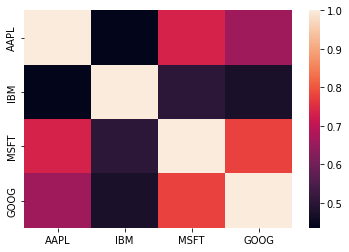

In [139]:
sns.heatmap(returns.corr())
#밝을수록 관계가 높은 기업임!! 어두울수록 관계가 없는 기업

In [140]:
returns.corrwith(returns.IBM)

AAPL    0.434692
IBM     1.000000
MSFT    0.502856
GOOG    0.472699
dtype: float64

In [141]:
returns.corrwith(volume)

AAPL   -0.070727
IBM    -0.136082
MSFT   -0.063773
GOOG   -0.111578
dtype: float64

### 유일값, 값 세기, 멤버십

In [142]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [143]:
uniques = obj.unique()
uniques  #겹치지 않은 값들로 만듦(set이라고 생각)

array(['c', 'a', 'd', 'b'], dtype=object)

In [144]:
obj.value_counts()  #각 값의 개수를 셈, 디폴트는 정렬!(개수가 많은 인덱스부터)

c    3
a    3
b    2
d    1
dtype: int64

In [145]:
pd.value_counts(obj.values, sort=False)  #개수를 세고 정렬은 안함!(기존 인덱스 순서대로)

c    3
a    3
d    1
b    2
dtype: int64

 ```isin``` 메서드는 어떤 값이 Series에 존재 하는지 나타내는 불리언 벡터를 반환  
 Series나 DataFrame의 컬럼에서 값을 골라내고 싶을 때 유용하게 사용
 

In [146]:
print(obj)
mask = obj.isin(['b', 'c'])
print(mask)  #b, c라는 값이 있으면 true
obj[mask]

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object
0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool


0    c
5    b
6    b
7    c
8    c
dtype: object

In [147]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'd'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)
#to_match라는 시리즈가 unique_vals의 몇 번째 문자인지(c: 0번째, a: 2번째, b: 1번째 ... 없으면 -1)

array([ 0,  2,  1,  1,  0, -1], dtype=int64)

In [148]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [149]:
result = data.apply(pd.value_counts)
print(result)  #각 열마다 숫자의 개수 = Qu1에서 1은 1개, 2는 0개, 3은 2개, 4는 2개, 5는 0개
#fillna()이 없기때문에 0개는 NaN으로 표기
result = data.apply(pd.value_counts).fillna(0)
result
#이거는 '값'들이 몇 개인지 센 결과, 왼쪽은 인덱스가 아닌 해당 값들임! 위의 예제와 비교!
#apply로 인해 행을 버리고 열의 결과로만 가져온 것! 그래서 왼쪽이 인덱스가 아닌 값들임!

   Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  NaN  2.0  1.0
3  2.0  2.0  NaN
4  2.0  NaN  2.0
5  NaN  NaN  1.0


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [150]:
result = data.apply(pd.value_counts, axis = 1).fillna(0)
#각 행마다 숫자의 개수 = 0행에서 1은 2개, 2는 1개, 3~5는 0개
result
#얘도 마찬가지로 apply, axis = 1이기 때문에 열을 삭제한 것! 열은 해당 값들임! 각 행에서 해당 값들이 몇 개 나왔는지 카운트한 것!

,1,2,3,4,5
0,2.0,1.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,2.0,0.0
